In [1]:
# pandas for data structures and operations for manipulating numerical tables and time series
import pandas
from pandas.plotting import scatter_matrix

# matplotlib.pyplot for data plots
import matplotlib.pyplot as plt

# sklearn for machine learning methods
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# for numeric calculations
import numpy as np

# from utilities import visualize_classifier


In [2]:
data = pandas.read_csv("HR-Employee-Attrition.csv")

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
print(data.shape)

(1470, 35)


In [4]:
list(data)

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [5]:
print(data.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
object_cols = data.select_dtypes(include='object').columns

#Dictionary to store the mappings for reporting
mapping_report = {}

#Replace categorical values with numeric codes
for col in object_cols:
    unique_vals = data[col].unique()
    val_to_code = {val: code for code, val in enumerate(unique_vals)}
    data[col] = data[col].map(val_to_code)
    mapping_report[col] = val_to_code

for col in mapping_report:
    print(f"\nColumn: {col}")
    for k, v in mapping_report[col].items():
        print(f"  '{k}' → {v}")


Column: Attrition
  'Yes' → 0
  'No' → 1

Column: BusinessTravel
  'Travel_Rarely' → 0
  'Travel_Frequently' → 1
  'Non-Travel' → 2

Column: Department
  'Sales' → 0
  'Research & Development' → 1
  'Human Resources' → 2

Column: EducationField
  'Life Sciences' → 0
  'Other' → 1
  'Medical' → 2
  'Marketing' → 3
  'Technical Degree' → 4
  'Human Resources' → 5

Column: Gender
  'Female' → 0
  'Male' → 1

Column: JobRole
  'Sales Executive' → 0
  'Research Scientist' → 1
  'Laboratory Technician' → 2
  'Manufacturing Director' → 3
  'Healthcare Representative' → 4
  'Manager' → 5
  'Sales Representative' → 6
  'Research Director' → 7
  'Human Resources' → 8

Column: MaritalStatus
  'Single' → 0
  'Married' → 1
  'Divorced' → 2

Column: Over18
  'Y' → 0

Column: OverTime
  'Yes' → 0
  'No' → 1


In [9]:
data[data.notnull()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,0,1102,0,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,1,1,279,1,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,0,0,1373,1,2,2,1,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1,1392,1,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,1,0,591,1,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,1,884,1,23,2,2,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,1,0,613,1,6,1,2,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,1,0,155,1,4,3,0,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,1,1,1023,0,2,3,2,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [10]:
data = data.dropna()

Were gonna check if the column Over18 is usefull. Sut den

In [11]:
print(data['Over18'].unique())

[0]


In [12]:
data.drop(['Over18'], axis=1, inplace=True)

In [13]:
print(data.groupby('Age').size())

Age
18     8
19     9
20    11
21    13
22    16
23    14
24    26
25    26
26    39
27    48
28    48
29    68
30    60
31    69
32    61
33    58
34    77
35    78
36    69
37    50
38    58
39    42
40    57
41    40
42    46
43    32
44    33
45    41
46    33
47    24
48    19
49    24
50    30
51    19
52    18
53    19
54    18
55    22
56    14
57     4
58    14
59    10
60     5
dtype: int64


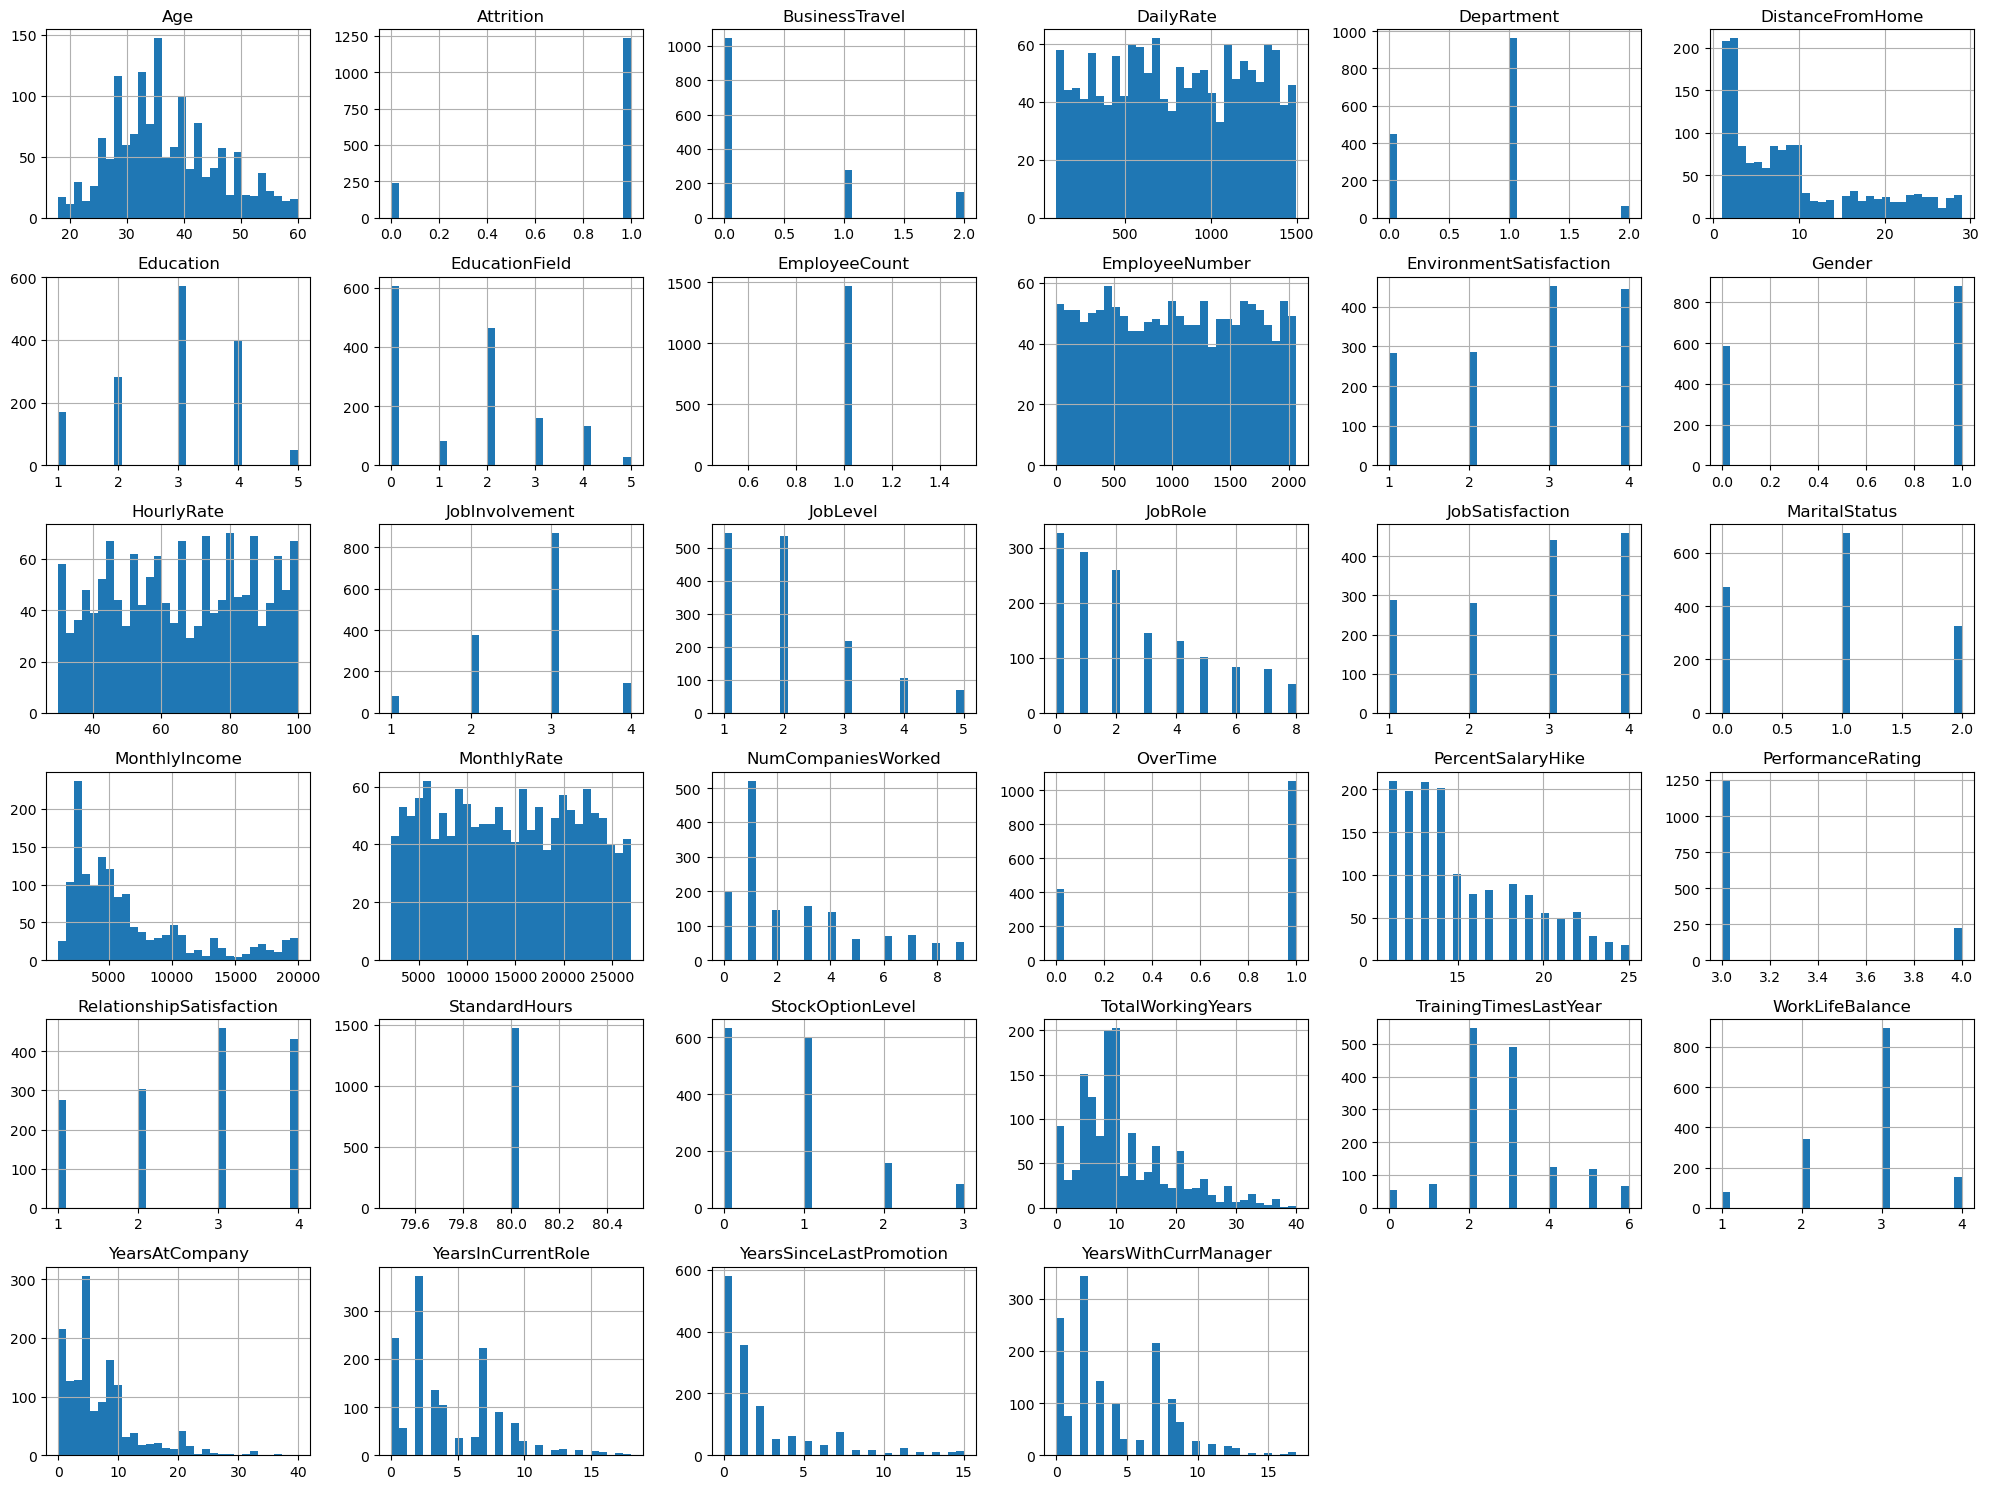

In [14]:
data.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

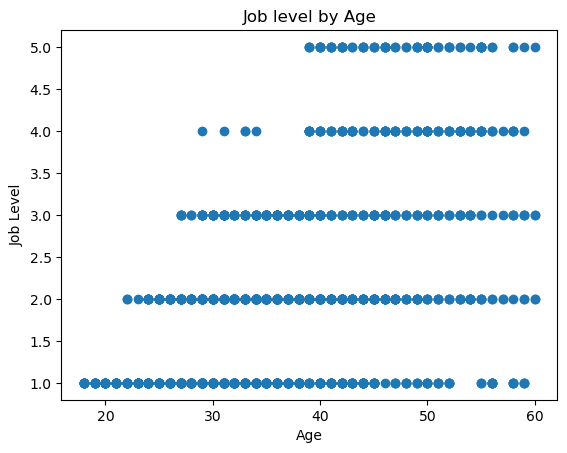

In [15]:
plt.scatter(data['Age'], data['JobLevel'],  marker="o", picker=True)
plt.title(f'Job level by Age')
plt.xlabel('Age')
plt.ylabel('Job Level')
plt.show()

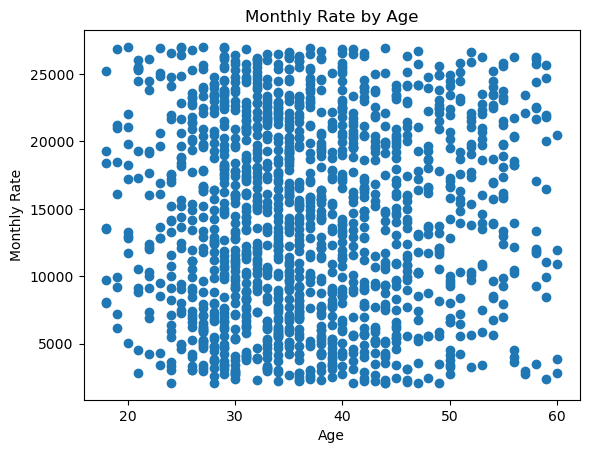

In [16]:
plt.scatter(data['Age'], data['MonthlyRate'],  marker="o", picker=True)
plt.title(f'Monthly Rate by Age')
plt.xlabel('Age')
plt.ylabel('Monthly Rate')
plt.show()

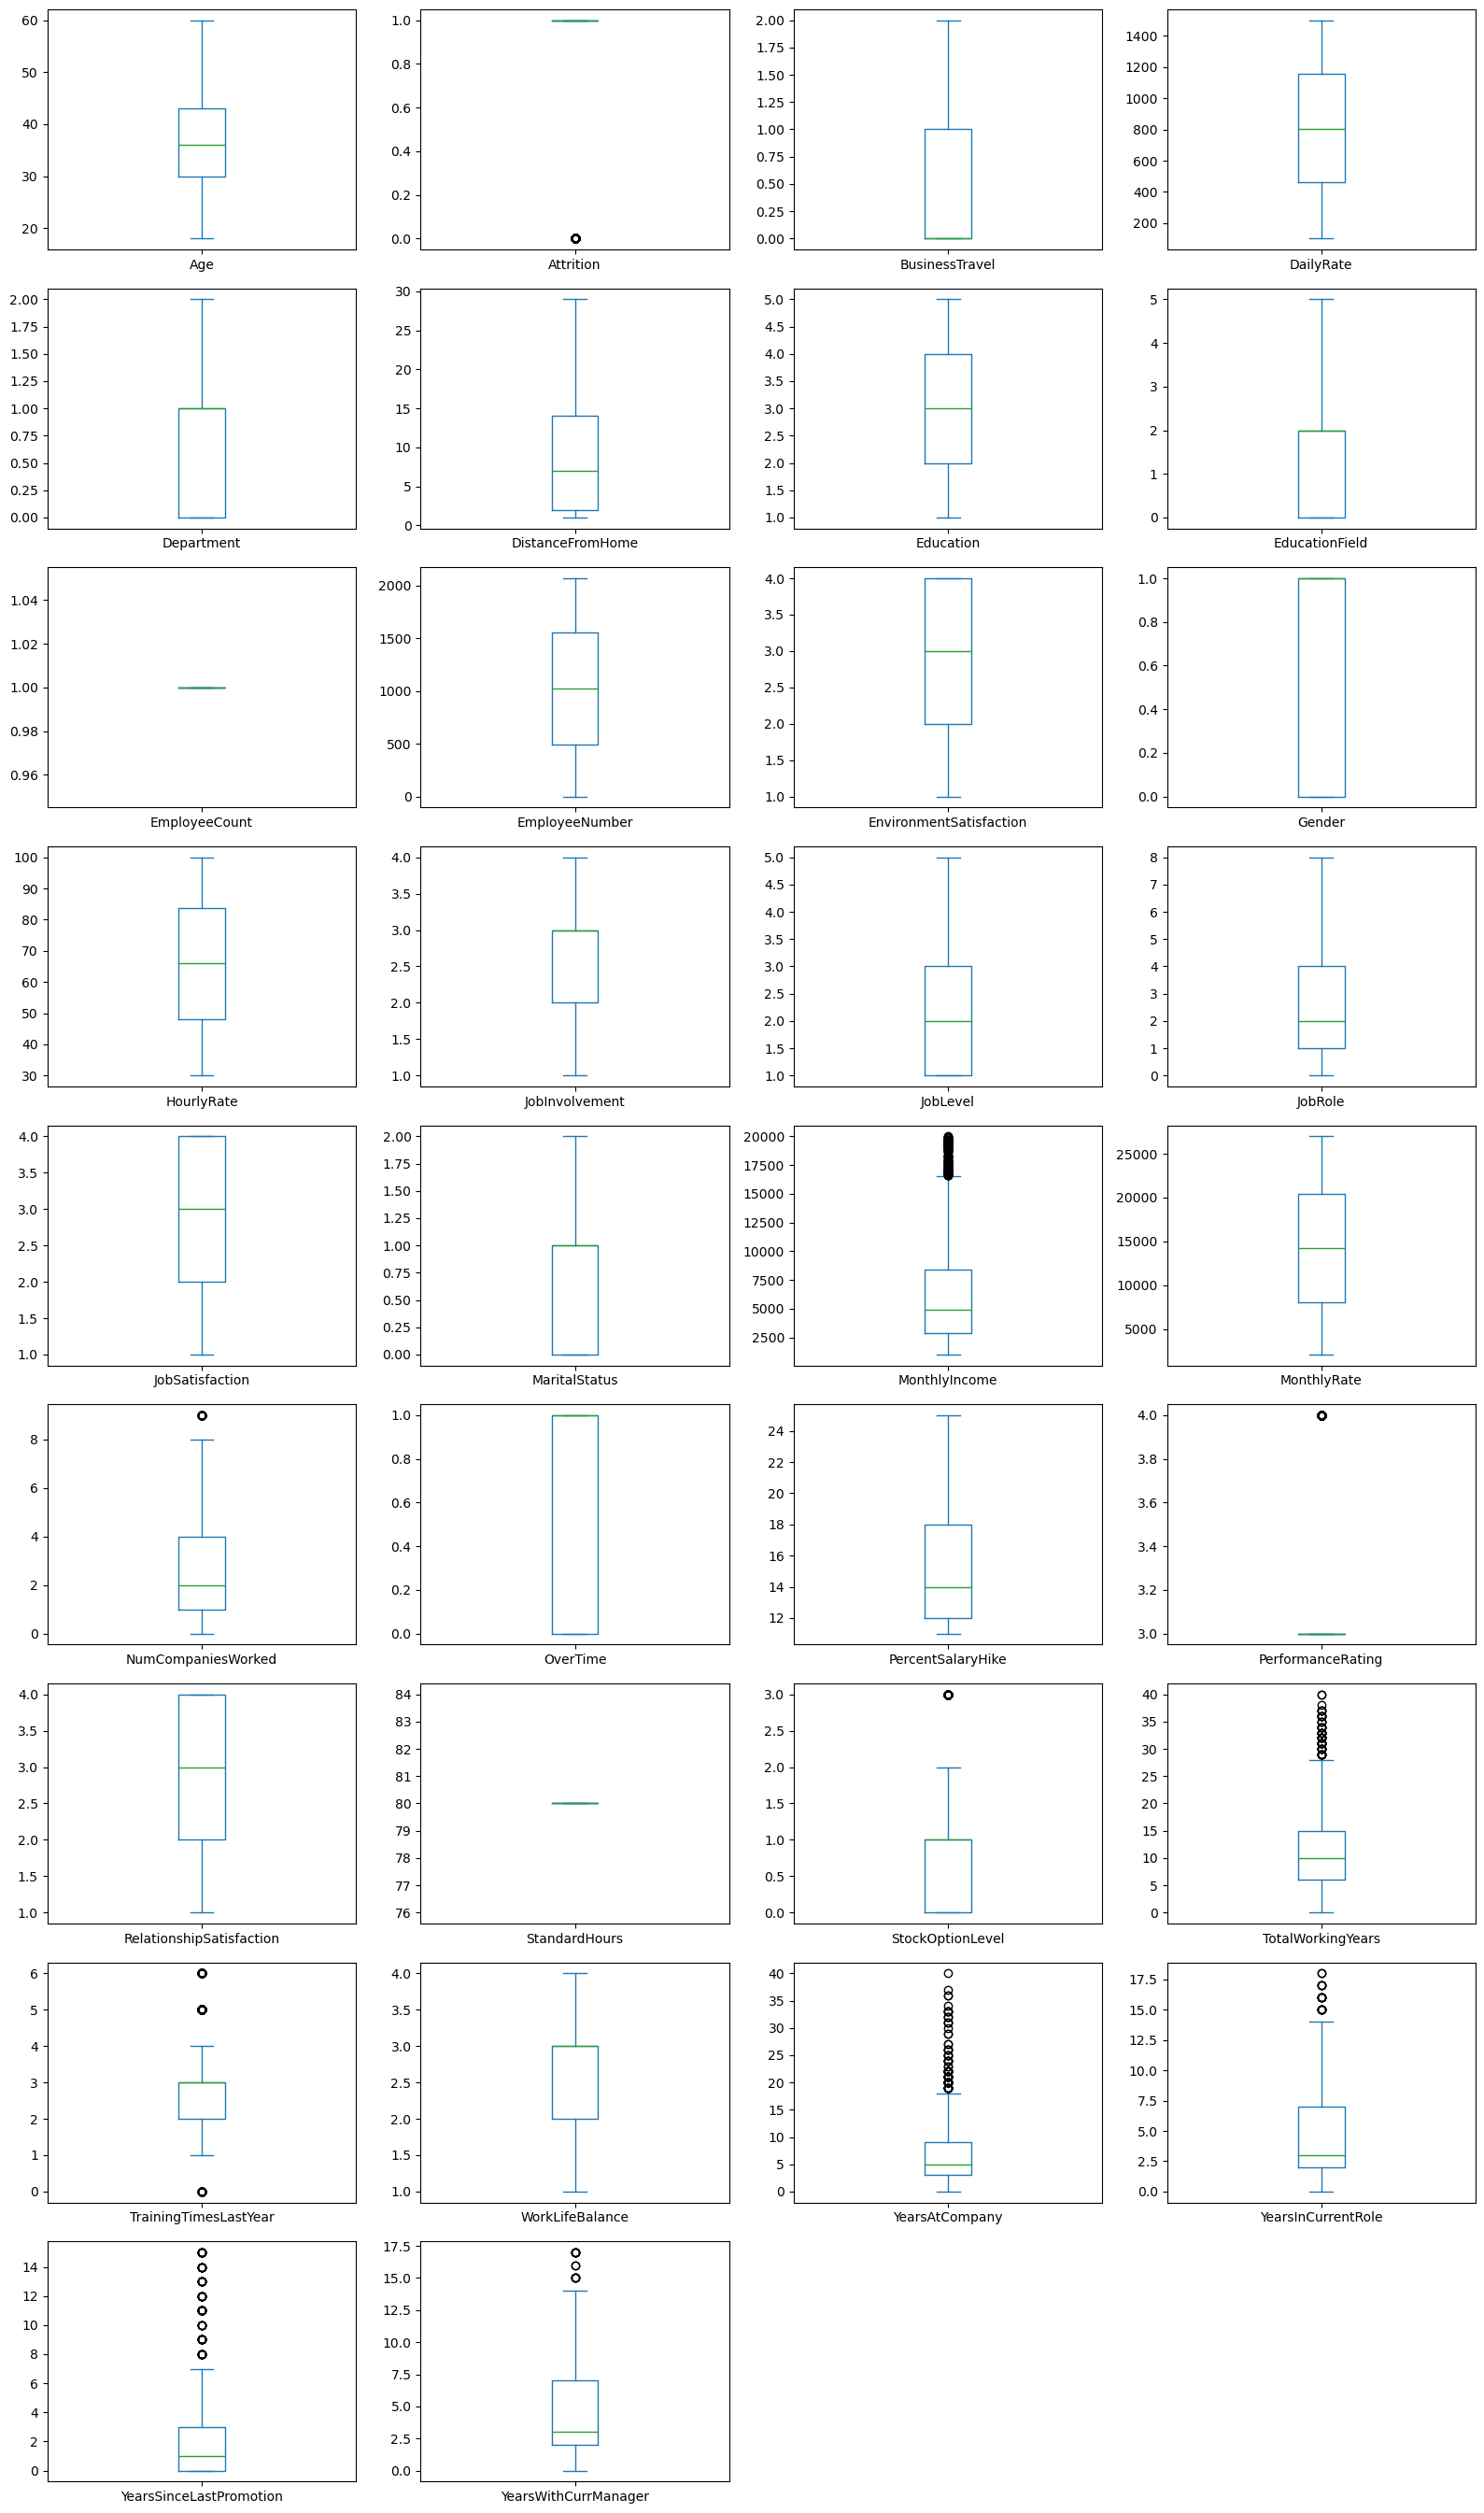

In [17]:
import math

num_columns = len(data.columns)
cols = 4
rows = math.ceil(num_columns / cols)

data.plot(kind='box', subplots=True, layout=(rows, cols), figsize=(4 * cols, 3 * rows), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


In [18]:
array = data.values

X, y = array[:, :-1], array[:, -1]

class0 = np.array(X[y==0])
class1 = np.array(X[y==1])
class2 = np.array(X[y==2])
class3 = np.array(X[y==3])
class4 = np.array(X[y==4])

In [19]:
set_prop = 0.2

seed = 7

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=set_prop, random_state=seed)

In [20]:
params = {'max_depth': 5}
classifier = DecisionTreeClassifier(**params)
# classifier = RandomForestClassifier(n_estimators = 100, max_depth = 6)
 
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [21]:
import graphviz
dot_data = tree.export_graphviz(classifier, out_file=None, 
                         feature_names=data.columns[:33], class_names = True,        
                         filled=True, rounded=True, proportion = False,
                         special_characters=True) 

In [22]:
graph = graphviz.Source(dot_data)
graph.render("company") 

'company.pdf'

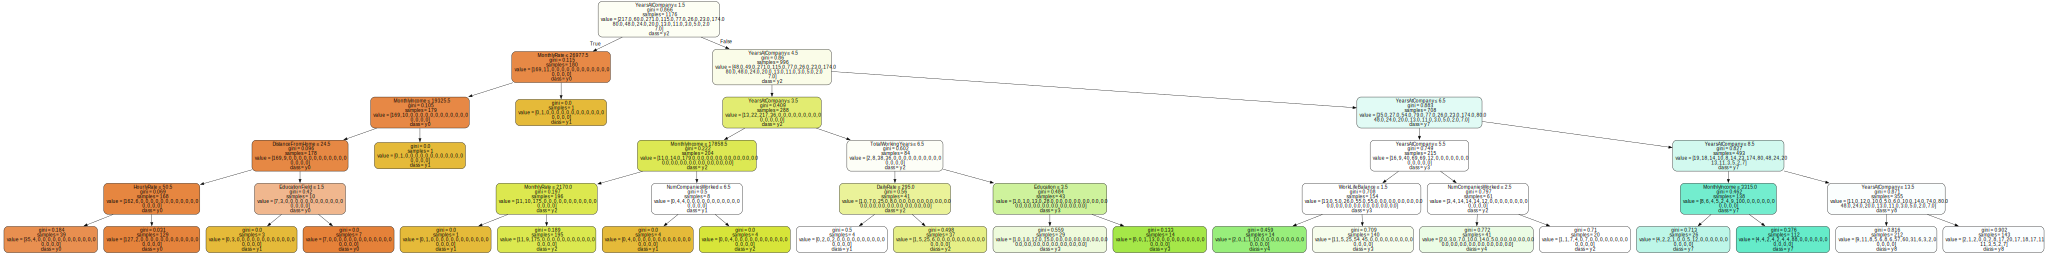

In [23]:
graph

In [24]:
# Set the metrics
scoring = 'accuracy'

In [25]:
# Predict the labels of the test data
y_testp = classifier.predict(X_test)
y_testp

array([3, 3, 0, 7, 3, 8, 2, 4, 2, 0, 4, 3, 2, 3, 1, 7, 3, 3, 8, 2, 1, 8,
       7, 3, 8, 7, 7, 8, 3, 8, 2, 2, 8, 2, 0, 8, 8, 8, 2, 7, 8, 2, 2, 2,
       0, 8, 8, 8, 2, 8, 8, 8, 8, 2, 3, 8, 7, 8, 7, 8, 0, 3, 3, 2, 0, 2,
       2, 7, 8, 2, 2, 4, 8, 8, 3, 2, 0, 8, 8, 2, 3, 8, 0, 8, 7, 7, 3, 8,
       8, 0, 8, 8, 8, 2, 8, 0, 2, 4, 7, 2, 0, 8, 8, 3, 3, 0, 8, 4, 8, 0,
       3, 3, 2, 3, 2, 0, 3, 2, 0, 2, 7, 0, 7, 2, 7, 0, 0, 2, 0, 2, 1, 8,
       2, 3, 3, 8, 7, 7, 0, 3, 2, 0, 3, 8, 8, 3, 0, 7, 8, 2, 3, 8, 2, 2,
       1, 2, 2, 8, 8, 3, 3, 3, 8, 2, 4, 7, 0, 3, 2, 3, 8, 8, 7, 8, 2, 3,
       2, 8, 3, 0, 7, 0, 3, 4, 8, 8, 3, 0, 2, 8, 2, 2, 8, 3, 8, 8, 2, 8,
       2, 0, 2, 0, 8, 7, 8, 7, 3, 2, 8, 8, 2, 8, 7, 3, 2, 8, 2, 3, 7, 8,
       3, 2, 8, 3, 8, 8, 8, 8, 8, 8, 8, 3, 0, 2, 2, 8, 3, 2, 1, 2, 3, 2,
       2, 3, 7, 8, 2, 8, 3, 3, 2, 8, 0, 8, 3, 2, 3, 8, 8, 2, 8, 8, 3, 8,
       3, 3, 0, 8, 7, 7, 8, 0, 8, 8, 2, 2, 2, 8, 7, 2, 8, 8, 7, 8, 3, 3,
       7, 2, 8, 2, 7, 8, 2, 2])

In [26]:
print ("Accuracy is ", accuracy_score(y_test,y_testp))

Accuracy is  0.5068027210884354


In [27]:
confusion_mat = confusion_matrix(y_test,y_testp)
confusion_mat

array([[31,  2,  8,  2,  0,  0,  0,  1,  2,  0,  0,  0,  0,  0,  0],
       [ 1,  2,  5,  3,  2,  0,  0,  2,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 48, 20,  1,  0,  0,  1,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  6, 18,  2,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3, 12,  1,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  3,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  3,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 22, 20,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 27,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0

In [28]:
confusion = pandas.crosstab(y_test,y_testp)
confusion

col_0,0,1,2,3,4,7,8
row_0,,,,,,,
0,31,2,8,2,0,1,2
1,1,2,5,3,2,2,1
2,0,1,48,20,1,1,2
3,0,0,6,18,2,0,1
4,0,0,3,12,1,0,5
5,0,0,0,0,1,3,1
6,0,0,0,0,0,3,3
7,0,0,0,0,0,22,20
8,0,0,0,0,0,0,27


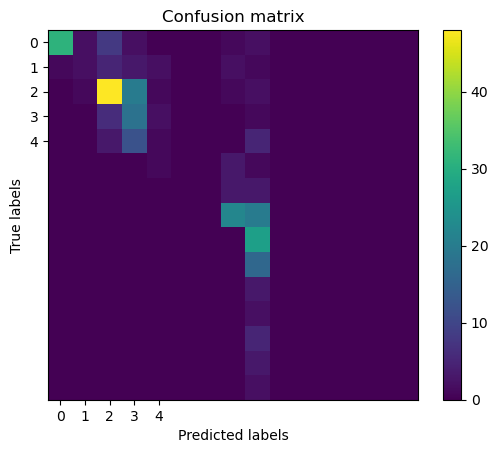

In [29]:
# Visualize confusion matrix
plt.imshow(confusion_mat, interpolation='nearest')
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(5)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

<Axes: >

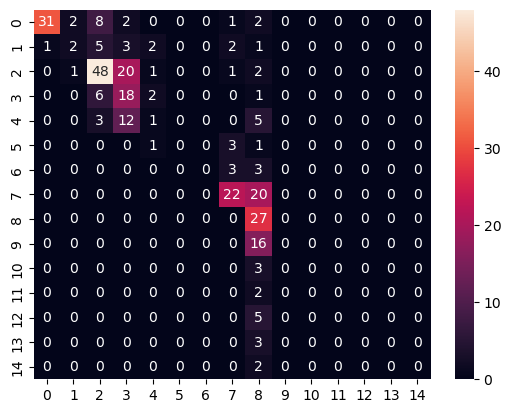

In [30]:
import seaborn as sns
sns.heatmap(confusion_mat, annot=True)

In [34]:
labels = sorted(np.unique(y_train))
class_names = [f'Class{i}' for i in labels]

print(classification_report(
    y_train,
    classifier.predict(X_train),
    labels=labels,
    target_names=class_names,
    zero_division=0  
))

              precision    recall  f1-score   support

      Class0       0.97      0.78      0.86       217
      Class1       0.86      0.20      0.32        60
      Class2       0.82      0.78      0.80       271
      Class3       0.45      0.71      0.55       115
      Class4       0.44      0.31      0.36        77
      Class5       0.00      0.00      0.00        26
      Class6       0.00      0.00      0.00        23
      Class7       0.72      0.57      0.64       174
      Class8       0.23      1.00      0.37        80
      Class9       0.00      0.00      0.00        48
     Class10       0.00      0.00      0.00        24
     Class11       0.00      0.00      0.00        20
     Class12       0.00      0.00      0.00        13
     Class13       0.00      0.00      0.00        11
     Class14       0.00      0.00      0.00         3
     Class15       0.00      0.00      0.00         5
     Class16       0.00      0.00      0.00         2
     Class17       0.00    

In [38]:
labels = sorted(np.unique(y_test))
class_names = [f'Class{i}' for i in labels]

print(classification_report(
    y_test,
    classifier.predict(X_test),
    labels=labels,
    target_names=class_names,
    zero_division=0  
))

              precision    recall  f1-score   support

      Class0       0.97      0.67      0.79        46
      Class1       0.40      0.12      0.19        16
      Class2       0.69      0.66      0.67        73
      Class3       0.33      0.67      0.44        27
      Class4       0.14      0.05      0.07        21
      Class5       0.00      0.00      0.00         5
      Class6       0.00      0.00      0.00         6
      Class7       0.69      0.52      0.59        42
      Class8       0.29      1.00      0.45        27
      Class9       0.00      0.00      0.00        16
     Class10       0.00      0.00      0.00         3
     Class11       0.00      0.00      0.00         2
     Class12       0.00      0.00      0.00         5
     Class13       0.00      0.00      0.00         3
     Class14       0.00      0.00      0.00         2

    accuracy                           0.51       294
   macro avg       0.23      0.25      0.21       294
weighted avg       0.51   